👥 Collaborators:
• Priyanjali Patel – Data preprocessing & EDA
• Luis Mancio  – Model building & evaluation


In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv("/kaggle/input/paysim1/PS_20174392719_1491204439457_log.csv")


In [6]:
print(df.shape)

(6362620, 11)


In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

NOTE: Transactions which are detected as fraud are cancelled, so for fraud detection these columns (oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest ) must not be used.

# Drop leakage columns right away
df_clean = df.drop(columns=["oldbalanceOrg", "newbalanceOrig", 
                      "oldbalanceDest", "newbalanceDest"])

In [7]:
df_clean = df.copy()

In [8]:
df_clean = df_clean.drop_duplicates()

In [9]:
print(df_clean.shape)

(6362620, 11)


In [12]:
#Are there any null values?
df_clean.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [13]:
for column in df_clean.columns:
    print(f"Unique values in column '{column}':")
    print(df_clean[column].unique())
    print("-" * 30)

Unique values in column 'step':
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 23

In [14]:
#Knowing data types is important because some models do not accept certain data types
df_clean.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [15]:
df_clean.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [18]:
# Size of the dataframe
print('The dataset contains {} records and {} features.\n'.format(df_clean.shape[0], df_clean.shape[1] - 1))

The dataset contains 6362620 records and 10 features.



In [19]:
df_clean['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [20]:
df_clean['isFraud'].unique()                         

array([0, 1])

In [21]:
df_clean['isFlaggedFraud'].unique()

array([0, 1])

In [22]:
df_clean.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [23]:
# Check data types
print(df_clean.dtypes)
print()
print('There are {} numeric and {} categorical features in the dataset.\n'\
      .format(df_clean[df_clean.columns[1:]].select_dtypes(include = np.number).shape[1], df_clean[df_clean.columns[1:]].select_dtypes(include = "object").shape[1]))

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

There are 7 numeric and 3 categorical features in the dataset.



In [24]:
# Summary statistics of the dataframe
print('Summary statistics for categorical data:')
print(round(df_clean.describe(include = "object").transpose(), 2))
print()
print('Summary statistics for numeric data:')
print(round(df_clean[df_clean.columns[1:]].describe(include = np.number).transpose(), 2))
print()
#df_clean.describe(include = "all").transpose()

Summary statistics for categorical data:
            count   unique          top     freq
type      6362620        5     CASH_OUT  2237500
nameOrig  6362620  6353307  C1530544995        3
nameDest  6362620  2722362  C1286084959      113

Summary statistics for numeric data:
                    count        mean         std  min       25%        50%  \
amount          6362620.0   179861.90   603858.23  0.0  13389.57   74871.94   
oldbalanceOrg   6362620.0   833883.10  2888242.67  0.0      0.00   14208.00   
newbalanceOrig  6362620.0   855113.67  2924048.50  0.0      0.00       0.00   
oldbalanceDest  6362620.0  1100701.67  3399180.11  0.0      0.00  132705.66   
newbalanceDest  6362620.0  1224996.40  3674128.94  0.0      0.00  214661.44   
isFraud         6362620.0        0.00        0.04  0.0      0.00       0.00   
isFlaggedFraud  6362620.0        0.00        0.00  0.0      0.00       0.00   

                       75%           max  
amount           208721.48  9.244552e+07  
oldbal

In [26]:
# Get the top N most frequent nameDest accounts
# Define N
N = 5
top_n_accounts = df_clean['nameDest'].value_counts().head(N)
print(top_n_accounts)

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
Name: count, dtype: int64


In [27]:
# Calculate mode value of categorical features
for value in df_clean.select_dtypes(include = "object").columns:
    replaceValue = df_clean.describe(include="object")[value].iloc[2]
    print(value, ':        ' + replaceValue)
    #crm_data_c[value][crm_data_c[value]=='?'] = replaceValue

type :        CASH_OUT
nameOrig :        C1530544995
nameDest :        C1286084959


In [30]:
print(df_clean)

         step      type      amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT     9839.64  C1231006815      170136.00   
1           1   PAYMENT     1864.28  C1666544295       21249.00   
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
4           1   PAYMENT    11668.14  C2048537720       41554.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0             160296.36  M1979787155            0.00            0.00        0   
1              19384.72  M2044282

In [33]:
# Separate numeric and categorical data for further evaluations
# Numeric features

data_num = df_clean.select_dtypes(include=np.number)

# Categorical features
data_cat = df_clean.select_dtypes(include=["object", "category"])

print('Numeric features:\n', data_num.columns.tolist())
print()
print('Categorical features:\n', data_cat.columns.tolist())

Numeric features:
 ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']

Categorical features:
 ['type', 'nameOrig', 'nameDest']


Numerical Features

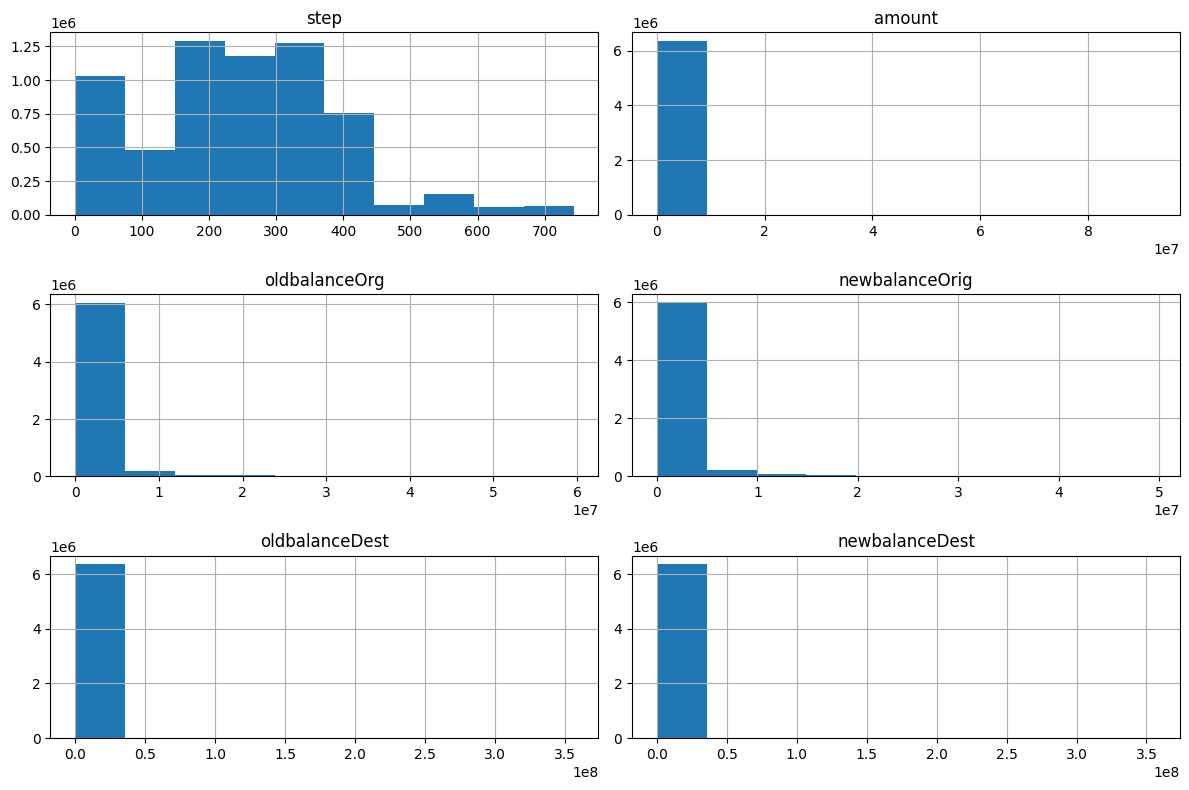

<Figure size 640x480 with 0 Axes>

In [34]:
# Histogram grid of numeric features (helps with outlier detection)
feature_cols = [c for c in data_num.columns if c not in ['isFraud', 'isFlaggedFraud']]
data_num[feature_cols].hist(figsize=(12,8), bins=10)
plt.tight_layout()
plt.show()
plt.clf()

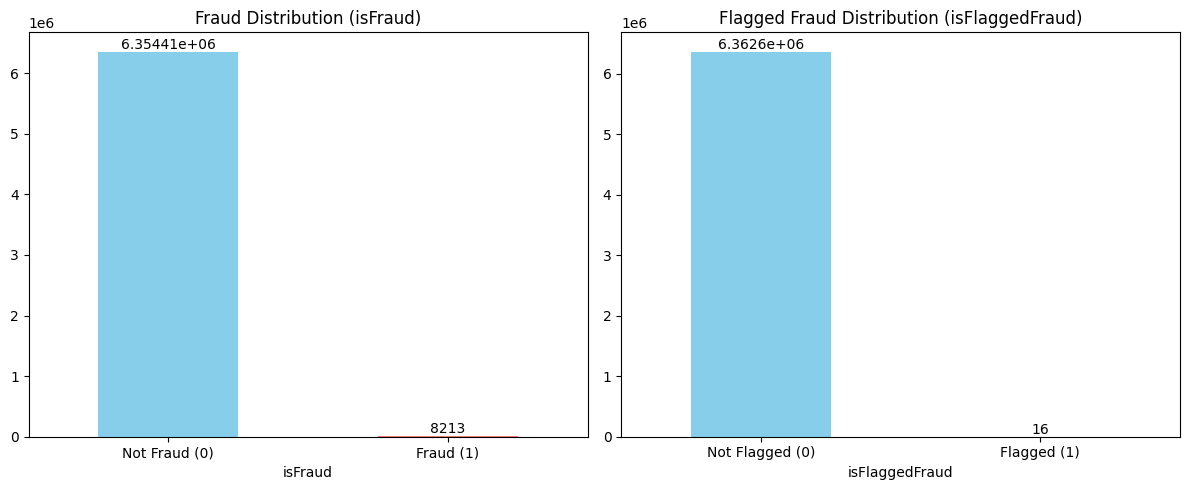

In [35]:
import matplotlib.pyplot as plt

# Plot fraud class distribution
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# isFraud distribution
df_clean['isFraud'].value_counts().plot(
    kind='bar', ax=axes[0], color=['skyblue', 'salmon'])
axes[0].set_title("Fraud Distribution (isFraud)")
axes[0].set_xticklabels(['Not Fraud (0)', 'Fraud (1)'], rotation=0)
axes[0].bar_label(axes[0].containers[0])

# isFlaggedFraud distribution
df_clean['isFlaggedFraud'].value_counts().plot(
    kind='bar', ax=axes[1], color=['skyblue', 'salmon'])
axes[1].set_title("Flagged Fraud Distribution (isFlaggedFraud)")
axes[1].set_xticklabels(['Not Flagged (0)', 'Flagged (1)'], rotation=0)
axes[1].bar_label(axes[1].containers[0])

plt.tight_layout()
plt.show()


In [ ]:
# Box plots (help with outlier detection)
#plt.figure(figsize = (10, 8))
#sns.boxplot(data = df_clean)
#plt.ylim(0, 3000000)  # only look at transactions under 5000
#plt.show()
#plt.xticks(rotation = 45)
#plt.clf()

## categorical features

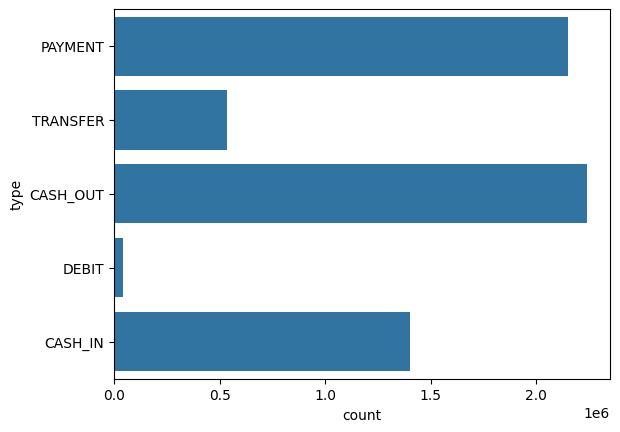

<Figure size 640x480 with 0 Axes>

In [36]:
# Count plot of some of the categorical features
for col in data_cat:
    if data_cat[col].nunique() < 10:
        sns.countplot(y = col, data = data_cat)
        plt.show()
    plt.clf()

Correlation matrix for the numeric features:



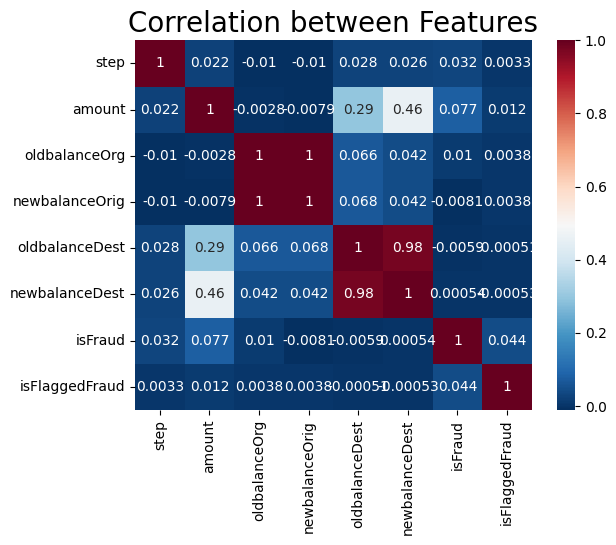

<Figure size 640x480 with 0 Axes>

In [38]:
print('Correlation matrix for the numeric features:\n')
corr_matrix = data_num.corr(method = 'pearson')
sns.heatmap(corr_matrix, annot = True, cmap = 'RdBu_r')
plt.title("Correlation between Features", fontsize = 20)
#plt.savefig("correlation_matrix.png")
plt.show()
plt.clf()

In [39]:
# Count and display the distribution of TYPES of financial transactions
print(df["type"].value_counts())

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


# To encode non-numerical feature like type

In [ ]:
# Save the mapping from encoded numeric values to original category labels before encoding process
#type_mapping_type = dict(enumerate(df['type'].astype('category').cat.categories))

In [40]:
# Copy dataframe
df_encoded = df_clean.copy()

# Encode 'type' column into numbers
df_encoded['type'] = df_encoded['type'].astype("category").cat.codes
# Create a mapping (number → category)
type_mapping_type = dict(enumerate(df_encoded['type'].astype('category').cat.categories))


# Encode 'nameOrig'
df_encoded['nameOrig'] = df_encoded['nameOrig'].astype("category").cat.codes
nameOrig_mapping = dict(enumerate(df_encoded['nameOrig'].astype('category').cat.categories))

# Encode 'nameDest'
df_encoded['nameDest'] = df_encoded['nameDest'].astype("category").cat.codes
nameDest_mapping = dict(enumerate(df_encoded['nameDest'].astype('category').cat.categories))


In [41]:
print(df_encoded.head())

   step  type    amount  nameOrig  oldbalanceOrg  newbalanceOrig  nameDest  \
0     1     3   9839.64    757869       170136.0       160296.36   1662094   
1     1     3   1864.28   2188998        21249.0        19384.72   1733924   
2     1     4    181.00   1002156          181.0            0.00    439685   
3     1     1    181.00   5828262          181.0            0.00    391696   
4     1     3  11668.14   3445981        41554.0        29885.86    828919   

   oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0             0.0             0.0        0               0  
1             0.0             0.0        0               0  
2             0.0             0.0        1               0  
3         21182.0             0.0        1               0  
4             0.0             0.0        0               0  


Correlation matrix for the numeric features:



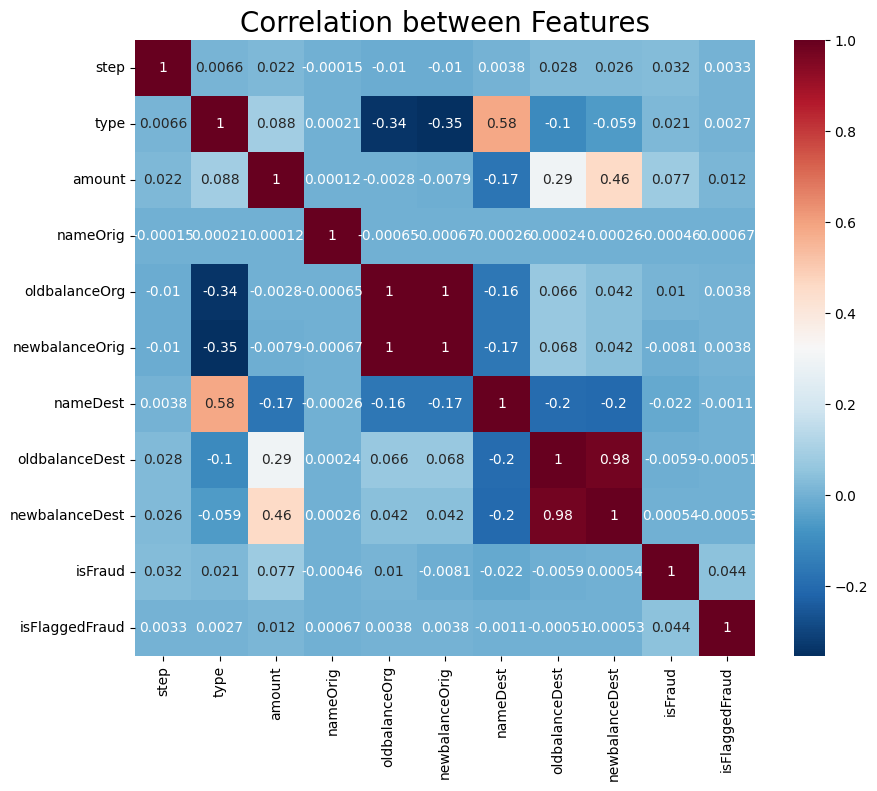

<Figure size 640x480 with 0 Axes>

In [42]:
plt.figure(figsize = (10, 8))
print('Correlation matrix for the numeric features:\n')
corr = df_encoded.corr(method = 'pearson')
sns.heatmap(corr, annot = True, cmap = 'RdBu_r')
plt.title("Correlation between Features", fontsize = 20)
#plt.savefig("correlation_matrix.png")
plt.show()
plt.clf()

## Senders activity

In [43]:
df_encoded['sender_txn_count'] = df_encoded.groupby('nameOrig')['nameOrig'].transform('count')
df_encoded['sender_avg_amount'] = df_encoded.groupby('nameOrig')['amount'].transform('mean')

# Receivers activity

In [44]:
df_encoded['receiver_txn_count'] = df_encoded.groupby('nameDest')['nameDest'].transform('count')
df_encoded['receiver_avg_amount'] = df_encoded.groupby('nameDest')['amount'].transform('mean')


In [45]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 15 columns):
 #   Column               Dtype  
---  ------               -----  
 0   step                 int64  
 1   type                 int8   
 2   amount               float64
 3   nameOrig             int32  
 4   oldbalanceOrg        float64
 5   newbalanceOrig       float64
 6   nameDest             int32  
 7   oldbalanceDest       float64
 8   newbalanceDest       float64
 9   isFraud              int64  
 10  isFlaggedFraud       int64  
 11  sender_txn_count     int64  
 12  sender_avg_amount    float64
 13  receiver_txn_count   int64  
 14  receiver_avg_amount  float64
dtypes: float64(7), int32(2), int64(5), int8(1)
memory usage: 637.1 MB


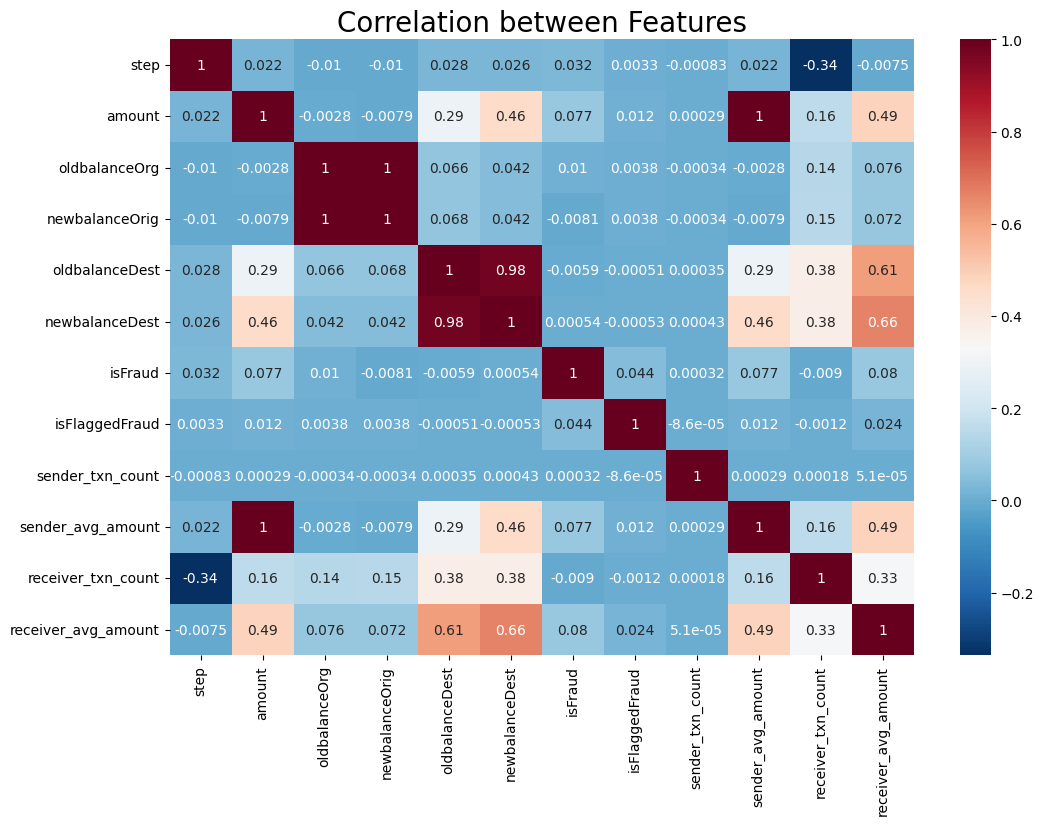

<Figure size 640x480 with 0 Axes>

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns + fraud label
corr_features = df_encoded.select_dtypes(include=['int64', 'float64'])

# Compute correlation
corr_matrix_cat = corr_features.corr(method = 'pearson')

# Plot
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix_cat, annot = True, cmap = 'RdBu_r')
plt.title("Correlation between Features", fontsize = 20)
#plt.savefig("correlation_matrix.png")
plt.show()
plt.clf()

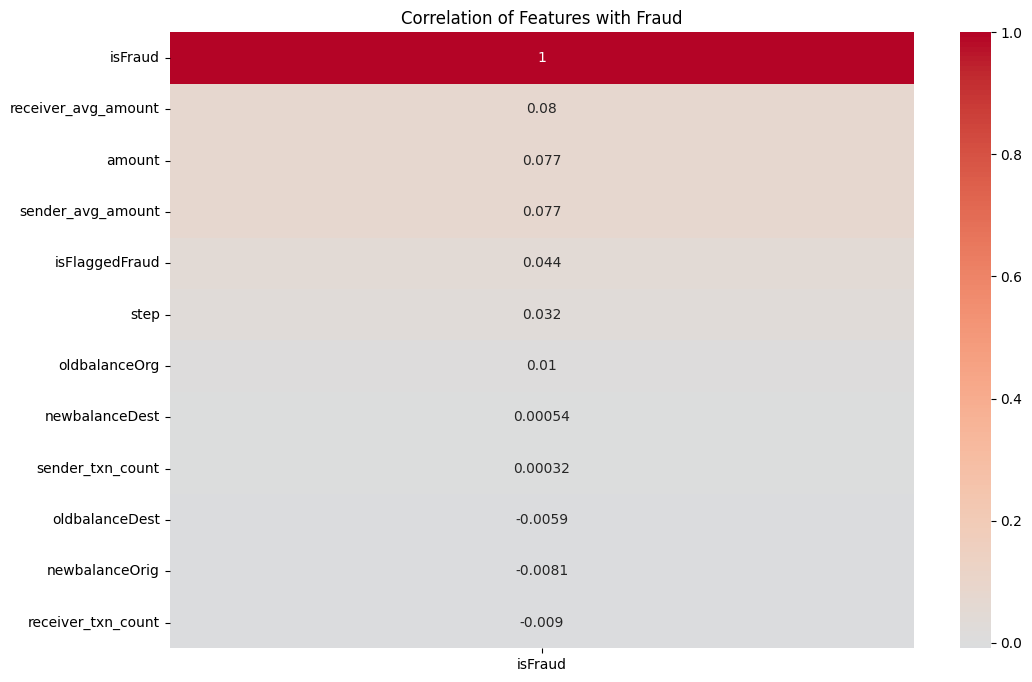

In [47]:
# Plot
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix_cat[['isFraud']].sort_values(by='isFraud', ascending=False), 
            annot=True, cmap='coolwarm', center=0)
plt.title("Correlation of Features with Fraud")
plt.show()

In [48]:
# Encode type as a non-numerical feature
df_hot_encoded = df_clean.copy()
df_hot_encoded['type'] = df_hot_encoded['type'].astype("category").cat.codes
df_hot_encoded['type'] 

0          3
1          3
2          4
3          1
4          3
          ..
6362615    1
6362616    4
6362617    1
6362618    4
6362619    1
Name: type, Length: 6362620, dtype: int8

# Feature Engineering

In [49]:
# Create a copy of df_clean so the next process won't change the original df_clean
df_feature = df_hot_encoded.copy()

In [50]:
df_feature.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,3,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,3,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# Transaction to Balance ratio

## Captures whether someone is sending a suspiciously large share of their balance.

In [52]:
df_feature['txn_to_balance_ratio'] = df_feature['amount'] / (df_feature['oldbalanceOrg'] + 1)

In [53]:
df_feature.shape

(6362620, 12)

In [54]:
df_feature['nameOrig'].nunique()

6353307

In [55]:
df_feature['txn_index'] = df_feature.groupby('nameOrig').cumcount() + 1

In [57]:
mask1 = (df_feature['txn_index']==2)
df_feature[mask1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,txn_to_balance_ratio,txn_index
115385,11,3,17670.78,C1709295811,488136.00,470465.22,M356415752,0.00,0.00,0,0,0.036200,2
146871,12,0,127216.34,C44568807,627.00,127843.34,C1768792843,95742.51,0.00,0,0,202.573790,2
148517,12,3,4611.17,C260230637,228156.00,223544.83,M350428813,0.00,0.00,0,0,0.020211,2
196159,13,3,2745.21,C745009740,0.00,0.00,M1554169249,0.00,0.00,0,0,2745.210000,2
208603,13,1,220681.45,C1842781381,70129.00,0.00,C1619574897,0.00,220681.45,0,0,3.146748,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6359886,715,3,3470.96,C876817986,38313.00,34842.04,M2021251796,0.00,0.00,0,0,0.090592,2
6360204,715,4,118688.81,C1313642079,110425.00,0.00,C927206109,0.00,118688.81,0,0,1.074827,2
6360821,717,1,40187.86,C188194996,69491.00,29303.14,C1210630308,679792.78,719980.63,0,0,0.578309,2
6361231,717,1,82899.05,C1170262181,253420.00,170520.95,C1991152940,61709.64,144608.69,0,0,0.327120,2


In [58]:
df_feature['txn_index'].value_counts()

txn_index
1    6353307
2       9298
3         15
Name: count, dtype: int64

In [59]:
df_feature['time_since_last_txn'] = df_feature.groupby('nameOrig')['step'].diff().fillna(0)


In [60]:
df_feature['time_since_last_txn'].value_counts()

time_since_last_txn
0.0      6353354
23.0          86
4.0           77
2.0           68
25.0          66
          ...   
436.0          1
557.0          1
643.0          1
664.0          1
466.0          1
Name: count, Length: 574, dtype: int64

In [61]:
df_feature['txn_per_hour'] = df_feature['txn_index'] / (df_feature['step'] + 1)  # avoid division by 0

In [62]:
df_feature['is_first_txn'] = (df_feature['txn_index'] == 1).astype(int)

In [63]:
df_feature['is_first_txn'].value_counts(normalize=True)

is_first_txn
1    0.998536
0    0.001464
Name: proportion, dtype: float64

In [64]:
mask1 = (df_feature['is_first_txn']==2)
df_feature[mask1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,txn_to_balance_ratio,txn_index,time_since_last_txn,txn_per_hour,is_first_txn


In [65]:
df_feature['is_first_txn'].nunique()

2

In [66]:
df_feature['is_first_txn'].unique()

array([1, 0])

In [67]:
df_feature['cum_amount_sender'] = df_feature.groupby('nameOrig')['amount'].cumsum().shift(1).fillna(0)

## Receiver

In [68]:
# 1. Compute cumulative received amount
df_feature['cum_amount_receiver'] = df_feature.groupby('nameDest')['amount'].cumsum().shift(1).fillna(0)

# 2. Compute transaction count per receiver
df_feature['receiver_txn_count'] = df_feature.groupby('nameDest').cumcount() + 1

# 3. Compute average amount received so far (before this transaction)
df_feature['avg_amount_receiver'] = df_feature['cum_amount_receiver'] / df_feature['receiver_txn_count']

df_feature['cum_amount_receiver'].value_counts(normalize=True)


cum_amount_receiver
10000000.00    1.119036e-04
20000000.00    3.096209e-05
30000000.00    1.194476e-05
40000000.00    3.929199e-06
5000.00        1.728848e-06
                   ...     
4676106.19     1.571680e-07
201988.47      1.571680e-07
548289.65      1.571680e-07
1214503.22     1.571680e-07
246276.12      1.571680e-07
Name: proportion, Length: 5668891, dtype: float64

In [70]:
df_feature['receiver_txn_count'].value_counts(normalize=True)
df_feature['avg_amount_receiver'].value_counts(normalize=True)


avg_amount_receiver
5.000000e+06    8.487070e-05
6.666667e+06    3.096209e-05
1.000000e+07    1.383078e-05
7.500000e+06    1.194476e-05
8.000000e+06    3.929199e-06
                    ...     
1.454369e+05    1.571680e-07
7.750077e+05    1.571680e-07
1.451287e+05    1.571680e-07
5.312009e+05    1.571680e-07
1.291777e+05    1.571680e-07
Name: proportion, Length: 5901033, dtype: float64

In [ ]:
# Drop leakage columns right away
df_feature = df_feature.drop(columns=["oldbalanceOrg", "newbalanceOrig", 
                      "oldbalanceDest", "newbalanceDest"])

In [74]:
df_feature.head()

,step,type,amount,nameOrig,nameDest,isFraud,isFlaggedFraud,txn_to_balance_ratio,txn_index,time_since_last_txn,txn_per_hour,is_first_txn,cum_amount_sender,cum_amount_receiver,receiver_txn_count,avg_amount_receiver
0,1,3,9839.64,C1231006815,M1979787155,0,0,0.057834,1,0.0,0.5,1,0.00,0.00,1,0.00
1,1,3,1864.28,C1666544295,M2044282225,0,0,0.087731,1,0.0,0.5,1,9839.64,9839.64,1,9839.64
2,1,4,181.00,C1305486145,C553264065,1,0,0.994505,1,0.0,0.5,1,1864.28,1864.28,1,1864.28
3,1,1,181.00,C840083671,C38997010,1,0,0.994505,1,0.0,0.5,1,181.00,181.00,1,181.00
4,1,3,11668.14,C2048537720,M1230701703,0,0,0.280788,1,0.0,0.5,1,181.00,181.00,1,181.00


In [75]:
df_feature_num = df_feature.select_dtypes(include=np.number)
df_feature_cat = df_feature.select_dtypes(include=["object","category"])

In [76]:
print('Numeric features:\n', df_feature_num.columns.tolist())
print('Categorical features:\n', df_feature_cat.columns.tolist())

Numeric features:
 ['step', 'type', 'amount', 'isFraud', 'isFlaggedFraud', 'txn_to_balance_ratio', 'txn_index', 'time_since_last_txn', 'txn_per_hour', 'is_first_txn', 'cum_amount_sender', 'cum_amount_receiver', 'receiver_txn_count', 'avg_amount_receiver']
Categorical features:
 ['nameOrig', 'nameDest']


In [77]:
df_feature_cat["nameOrig"].nunique()

6353307

In [78]:
df_feature_cat["nameDest"].nunique()

2722362

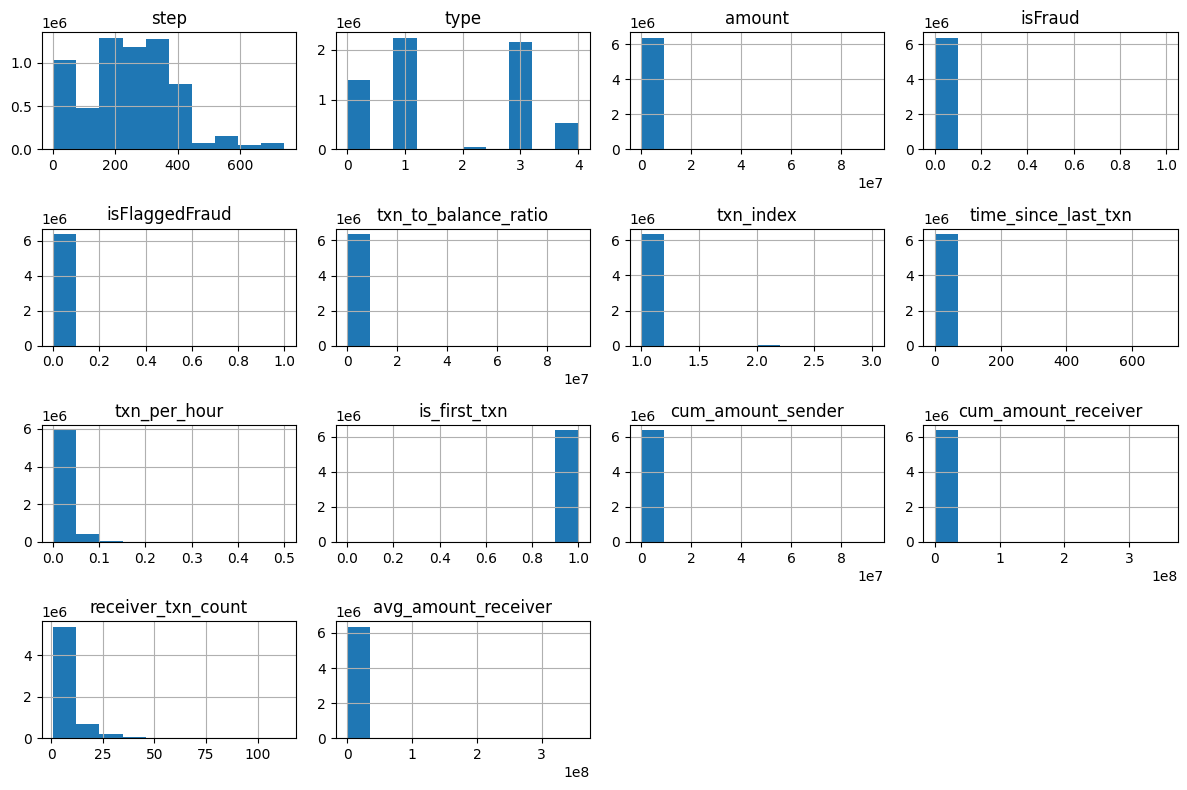

In [79]:
#plt.hist(df_model_num, bins=30)

feature_cols = [c for c in df_feature_num.columns]
df_feature_num[feature_cols].hist(figsize=(12,8), bins=10)
plt.tight_layout()
plt.show()


We will not use isFlaggedFraud as a feature in training.

Here’s why:

isFlaggedFraud is a label-like indicator, created by the data provider to mark suspicious or rule-based flags (e.g., transactions over certain limits).

It often correlates directly with the target variable isFraud, so including it would cause data leakage — your model would “cheat” by learning from a feature that already knows something about the answer.

In real life, this flag wouldn’t be available at prediction time (since it’s generated after transaction rules trigger).

In [80]:
# Drop leakage columns right away
df_feature = df_feature.drop(columns=["nameOrig","nameDest"])

In [81]:
df_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 14 columns):
 #   Column                Dtype  
---  ------                -----  
 0   step                  int64  
 1   type                  int8   
 2   amount                float64
 3   isFraud               int64  
 4   isFlaggedFraud        int64  
 5   txn_to_balance_ratio  float64
 6   txn_index             int64  
 7   time_since_last_txn   float64
 8   txn_per_hour          float64
 9   is_first_txn          int64  
 10  cum_amount_sender     float64
 11  cum_amount_receiver   float64
 12  receiver_txn_count    int64  
 13  avg_amount_receiver   float64
dtypes: float64(7), int64(6), int8(1)
memory usage: 637.1 MB


In [82]:
for col in df_feature.columns:
    print(f"\nColumn: {col}")
    print(df_feature[col].value_counts().to_frame('count').assign(
        proportion=lambda x: x['count'] / x['count'].sum()))



Column: step
      count    proportion
step                     
19    51352  8.070889e-03
18    49579  7.792230e-03
187   49083  7.714275e-03
235   47491  7.464064e-03
307   46968  7.381865e-03
...     ...           ...
706       4  6.286718e-07
721       4  6.286718e-07
693       4  6.286718e-07
112       2  3.143359e-07
662       2  3.143359e-07

[743 rows x 2 columns]

Column: type
        count  proportion
type                     
1     2237500    0.351663
3     2151495    0.338146
0     1399284    0.219923
4      532909    0.083756
2       41432    0.006512

Column: amount
             count    proportion
amount                          
10000000.00   3207  5.040376e-04
10000.00        88  1.383078e-05
5000.00         79  1.241627e-05
15000.00        68  1.068742e-05
500.00          65  1.021592e-05
...            ...           ...
151849.59        1  1.571680e-07
341252.72        1  1.571680e-07
431409.04        1  1.571680e-07
344148.22        1  1.571680e-07
258347.61       

In [ ]:
df_feature = df_feature.drop(columns=["isFlaggedFraud"])

In [86]:
df_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 13 columns):
 #   Column                Dtype  
---  ------                -----  
 0   step                  int64  
 1   type                  int8   
 2   amount                float64
 3   isFraud               int64  
 4   txn_to_balance_ratio  float64
 5   txn_index             int64  
 6   time_since_last_txn   float64
 7   txn_per_hour          float64
 8   is_first_txn          int64  
 9   cum_amount_sender     float64
 10  cum_amount_receiver   float64
 11  receiver_txn_count    int64  
 12  avg_amount_receiver   float64
dtypes: float64(7), int64(5), int8(1)
memory usage: 588.6 MB


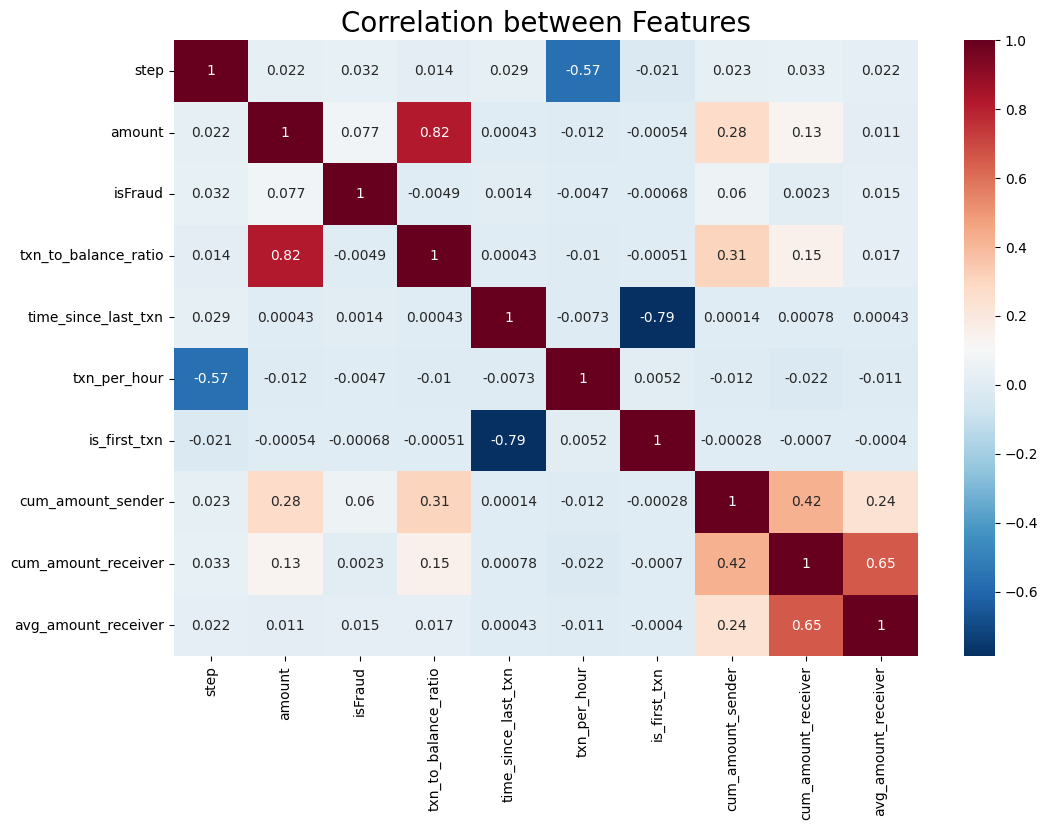

<Figure size 640x480 with 0 Axes>

In [87]:
# Select numeric columns + fraud label
corr_features = df_feature.select_dtypes(include=['int64', 'float64'])

# Compute correlation
corr_matrix_cat = corr_features.corr(method = 'pearson')

# Plot
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix_cat, annot = True, cmap = 'RdBu_r')
plt.title("Correlation between Features", fontsize = 20)
#plt.savefig("correlation_matrix.png")
plt.show()
plt.clf()

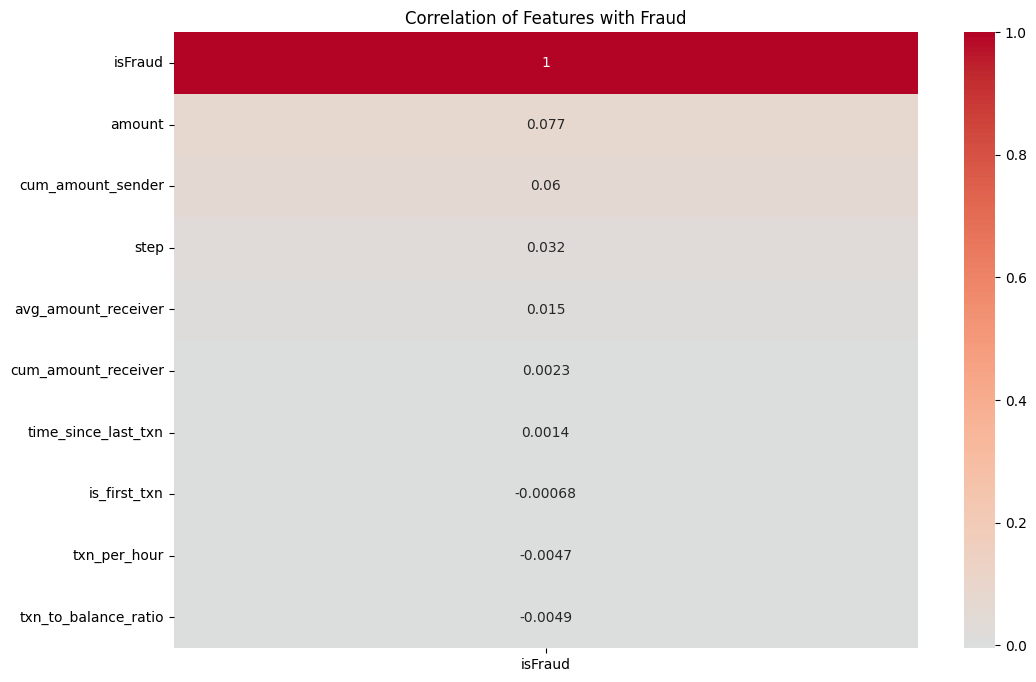

In [88]:
# Plot
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix_cat[['isFraud']].sort_values(by='isFraud', ascending=False), 
            annot=True, cmap='coolwarm', center=0)
plt.title("Correlation of Features with Fraud")
plt.show()

In [ ]:
df_feature= df_feature.drop(columns=["txn_index","is_first_txn","txn_to_balance_ratio"])

df_feature.to_csv("df_feature.csv", index=False)

In [93]:
#Check balance dataset
df_feature['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [94]:
#Put isFraud as last column in dataframe
df_feature = df_feature[[col for col in df_feature.columns if col != 'isFraud'] + ['isFraud']]

**Split Data**

This is very important for imbalanced classification (like fraud detection).
It ensures that:

The class proportions (fraud vs non-fraud) are the same in both training and test sets.

In [95]:
from sklearn.model_selection import train_test_split

# Create sets X y Y
X = df_feature.iloc[:, :-1]  # Columns for training
Y = df_feature.iloc[:, -1]   # Column to predict (isFraud)

#  Trainning data (70%) and test and validation (30%)
x_tr, x_resto, y_tr, y_resto = train_test_split(
    X, Y,
    train_size=0.7,
    random_state=123,
    stratify=Y     # Keeps the ratio frauds/no-frauds
)

# Divide test and validation (15% + 15%)
x_vl, x_ts, y_vl, y_ts = train_test_split(
    x_resto, y_resto,
    test_size=0.5,
    random_state=123,
    stratify=y_resto    # Keeps the ratio frauds/no-frauds
)

print('Size of trainning set: ', x_tr.shape, y_tr.shape)
print('Size of validation set: ', x_vl.shape, y_vl.shape)
print('Size of test set: ', x_ts.shape, y_ts.shape)

# Verifica las proporciones
print("\n Fraud ratio in each dataset:")
print("Train:", y_tr.mean())
print("Validation:", y_vl.mean())
print("Test:", y_ts.mean())

Size of trainning set:  (4453834, 9) (4453834,)
Size of validation set:  (954393, 9) (954393,)
Size of test set:  (954393, 9) (954393,)

 Fraud ratio in each dataset:
Train: 0.001290797995614565
Validation: 0.001290872837499856
Test: 0.001290872837499856


scale_pos_weight = how many non-fraud examples there are per fraud example.
It helps XGBoost balance learning between majority and minority classes.

If you have 100,000 transactions and 500 are frauds,
→ scale_pos_weight = 99500 / 500 = 199.
This means fraud samples are weighted 199× more than non-fraud during training.

In [96]:
# Calculate scale_pos_weight
n_pos = y_tr.sum()
n_neg = len(y_tr) - n_pos
scale_pos_weight = n_neg / n_pos
print("scale_pos_weight =", scale_pos_weight)

scale_pos_weight = 773.7145590537485


## Training model
We create a dictionary with the most important hyperparameters of the model


In [98]:
params = {
    'booster': 'gbtree',
    'tree_method': 'hist',         # o 'gpu_hist' si tienes GPU
    'eta': 0.05,                   # learning rate (más conservador)
    'gamma': 0,                    # considerar >0 si quieres splits más conservadores
    'lambda': 1.0,                 # regularización L2 (no dejar 0)
    'alpha': 0.0,                  # L1 (opcional)
    'max_depth': 6,
    'min_child_weight': 5,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'n_estimators': 100, # Número de árboles
    'objective': 'binary:logistic', #It means our classifier is binay
    'scale_pos_weight': scale_pos_weight,
    'eval_metric': ['auc','aucpr'],   # monitorear ambas
    'random_state': 42,               # random seed
    'enable_categorical': False       # Our input is numerical
}

In [99]:
# Import and create model
from xgboost import XGBClassifier

modelo = XGBClassifier(**params)
modelo.fit(x_tr,y_tr)

XGBClassifier(alpha=0.0, base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.05, eval_metric=['auc', 'aucpr'],
              feature_types=None, feature_weights=None, gamma=0,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=1.0, learning_rate=None,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, ...)

[# Model metrics

*   List item
*   List item


Recall, Precision, F1, ROC-AUC, PR-AUC](https://)

In [101]:
from sklearn.metrics import recall_score
recall = recall_score(y_vl, modelo.predict(x_vl))
print(f"Recall (detected frauds): {100*recall:.2f}%")


Recall (detected frauds): 99.43%


In [102]:
from sklearn.metrics import precision_score
precision = precision_score(y_vl, modelo.predict(x_vl))
print(f"Precision (predicted frauds vs real frauds): {100*precision:.2f}%")

Precision (predicted frauds vs real frauds): 3.32%


In [103]:
from sklearn.metrics import f1_score
f1 = f1_score(y_vl, modelo.predict(x_vl))
print(f"F1-score: {f1:.3f}")

F1-score: 0.064


In [104]:
from sklearn.metrics import roc_auc_score, average_precision_score

y_pred_proba = modelo.predict_proba(x_vl)[:, 1]
roc_auc = roc_auc_score(y_vl, y_pred_proba)
pr_auc = average_precision_score(y_vl, y_pred_proba)

print(f"ROC-AUC: {roc_auc:.3f}")
print(f"PR-AUC: {pr_auc:.3f}")


ROC-AUC: 0.996
PR-AUC: 0.476


Cross validations is more accurate way to evaluate the model performance:

In [105]:
# Convertir el set de entrenamiento (x_tr, y_tr) al formato DMatrix usado por XGBoost
dtrain = xgb.DMatrix(data=x_tr, label=y_tr, enable_categorical=False)

# Hiper-Parámetros
params = {
    'booster': 'gbtree',
    'tree_method': 'hist',         #  'gpu_hist'if you have GPU
    'eta': 0.05,                   # learning rate
    'gamma': 0,                    #
    'lambda': 1.0,                 # Regularization L2
    'alpha': 0.0,                  # L1 (optional)
    'max_depth': 6,
    'min_child_weight': 5,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    #'n_estimators': 100, # Número de árboles
    'objective': 'binary:logistic', #It means our classifier is binay
    'scale_pos_weight': scale_pos_weight,
    'eval_metric': ['auc','aucpr'],   # Metrics of performing
    'random_state': 42,               # random seed
    #'enable_categorical': False       # Our input is numerical
}

# Validación cruzada (5-fold) (no es necesario definir el tipo de modelo, este se infiere
# del hiper-parámetro "objective")
cv_res = xgb.cv(
    params=params,
    dtrain=dtrain,
    num_boost_round=100,            # Número de árboles a usar
    nfold=5,                        # Número de particiones
    seed=123,                       # Semilla generador aleatorio
    as_pandas=True                  # Retornar resultados como DataFrame de Pandas
)

cv_res

,train-auc-mean,train-auc-std,train-aucpr-mean,train-aucpr-std,test-auc-mean,test-auc-std,test-aucpr-mean,test-aucpr-std
0,0.954340,0.000692,0.144695,0.014893,0.949701,0.002040,0.140834,0.015319
1,0.956015,0.000590,0.197995,0.012845,0.952240,0.001091,0.189320,0.013044
2,0.984877,0.000305,0.324953,0.008197,0.982827,0.000557,0.311436,0.011458
3,0.988892,0.000130,0.368146,0.005038,0.987540,0.000818,0.352787,0.006024
4,0.990245,0.000086,0.383775,0.004515,0.989144,0.000898,0.368366,0.007881
...,...,...,...,...,...,...,...,...
95,0.996273,0.000076,0.462868,0.007500,0.995518,0.000390,0.442382,0.009308
96,0.996337,0.000064,0.466419,0.007679,0.995568,0.000394,0.446060,0.009255
97,0.996347,0.000052,0.466388,0.007276,0.995576,0.000393,0.446379,0.008402
98,0.996360,0.000059,0.468333,0.006672,0.995587,0.000396,0.448011,0.007252


In [106]:
ronda_optima = cv_res['train-auc-mean'].idxmax() # Number of trees with best auc-mean
best_auc_train = cv_res['train-auc-mean'].iloc[ronda_optima]
best_auc_test = cv_res['test-auc-mean'].iloc[ronda_optima]

# Imprimir resultados en pantalla
print(f'Number of trees with best auc-mean: {ronda_optima+1}')
print(f'Best AUC train: {100*best_auc_train:.1f}%')
print(f'Best AUC test: {100*best_auc_test:.1f}%')

Number of trees with best auc-mean: 100
Best AUC train: 99.6%
Best AUC test: 99.6%


**Early Stopping**

The early_stopping_rounds parameter in XGBoost is a powerful regularization technique used to automatically halt the training process when a model's performance on a validation dataset stops improving for a specified number of consecutive rounds.

In [108]:
#Hiper-parameters
params = {
    'booster': 'gbtree',
    'tree_method': 'hist',         #  'gpu_hist'if you have GPU
    'eta': 0.05,                   # learning rate
    'gamma': 0,                    #
    'lambda': 1.0,                 # Regularization L2
    'alpha': 0.0,                  # L1 (optional)
    'max_depth': 6,
    'min_child_weight': 5,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'n_estimators': 1000, # Número de árboles
    'early_stopping_rounds': 10,     #Number of steps in which the model doesn't have any improvement
    'objective': 'binary:logistic', #It means our classifier is binay
    'scale_pos_weight': scale_pos_weight,
    'eval_metric': 'aucpr',   # Metrics of performing
    'random_state': 42,               # random seed
    #'enable_categorical': False       # Our input is numerical
}
# Create model with parameters
modelo = XGBClassifier(**params)

# Train model
modelo.fit(x_tr, y_tr, eval_set=[(x_vl, y_vl)], verbose=True)

[0]	validation_0-aucpr:0.12867
[1]	validation_0-aucpr:0.19393
[2]	validation_0-aucpr:0.34798
[3]	validation_0-aucpr:0.38619
[4]	validation_0-aucpr:0.39902
[5]	validation_0-aucpr:0.42542
[6]	validation_0-aucpr:0.42730
[7]	validation_0-aucpr:0.41637
[8]	validation_0-aucpr:0.41728
[9]	validation_0-aucpr:0.41645
[10]	validation_0-aucpr:0.40144
[11]	validation_0-aucpr:0.39555
[12]	validation_0-aucpr:0.39457
[13]	validation_0-aucpr:0.37904
[14]	validation_0-aucpr:0.38301
[15]	validation_0-aucpr:0.36736
[16]	validation_0-aucpr:0.36161


XGBClassifier(alpha=0.0, base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=10,
              enable_categorical=False, eta=0.05, eval_metric='aucpr',
              feature_types=None, feature_weights=None, gamma=0,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=1.0, learning_rate=None,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, ...)

Early Stopping and Cross Validation

“Try building up to 100 trees, one after another.”

At each round (tree):

XGBoost looks at current prediction errors (residuals).

It builds a small new tree that tries to fix those errors.

It adds that tree to the model (weighted by the learning rate eta).

So after training, you have something like:

Final prediction = Tree₁ + 0.05*Tree₂ + 0.05*Tree₃ + ... + Tree₁₀₀



xgb.cv(..., num_boost_round=100, nfold=5) you’re asking XGBoost to:

Build up to 100 trees on each of 5 train-validation splits.

Track how the validation metric (e.g., AUC-PR) improves with each added tree.

Stop (or report the best round) when adding more trees doesn’t help.

So CV doesn’t create trees for each sample — it repeats the tree-building process for each fold of the data.


In [110]:
# Convert the dataset (x_tr, y_tr) to DMatrix format used by XGBoost
dtrain = xgb.DMatrix(data=x_tr, label=y_tr)


# Hiperparameters
params = {
    'booster': 'gbtree',
    'tree_method': 'hist',         #  'gpu_hist'if you have GPU
    'eta': 0.05,                   # learning rate
    'gamma': 0,                    #
    'lambda': 1.0,                 # Regularization L2
    'alpha': 0.0,                  # L1 (optional)
    'max_depth': 5,
    'min_child_weight': 5,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'n_estimators': 1000, # Número de árboles
    'early_stopping_rounds': 10,     #Number of steps in which the model doesn't have any improvement
    'objective': 'binary:logistic', #It means our classifier is binay
    'scale_pos_weight': scale_pos_weight,
    'eval_metric': 'aucpr',   # Metrics of performing
    'random_state': 42,               # random seed
    #'enable_categorical': False       # Our input is numerical
}

# Cross validation (5-fold)
cv_res = xgb.cv(
    params=params,
    dtrain=dtrain,
    num_boost_round=1000,           # Number of trees
    nfold=5,                        # Number of folds
    seed=123,                       # Random seed
    early_stopping_rounds=10,       # **** Hyper-parameters EARLY STOPPING ****
    as_pandas=True                  # Retornar resultados como DataFrame de Pandas
)

cv_res

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:225: UserWarning: [13:13:15] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "early_stopping_rounds", "n_estimators" } are not used.

  return getattr(self.bst, name)(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:231: UserWarning: [13:13:16] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "early_stopping_rounds", "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:231: UserWarning: [13:13:18] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "early_stopping_rounds", "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:231: UserWarning: [13:13:19] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "early_stopping_rounds", "n_estimators" } are not used.

  self.bst.update(self.dtrain, iteration, fobj)
/u

,train-aucpr-mean,train-aucpr-std,test-aucpr-mean,test-aucpr-std
0,0.106887,0.000695,0.106141,0.003598
1,0.159068,0.005223,0.157612,0.013290
2,0.288155,0.006029,0.284551,0.010148
3,0.323869,0.004880,0.318771,0.008662
4,0.335896,0.004412,0.330717,0.008831
5,0.360608,0.004851,0.354610,0.007490


### Generate Predictions

In [111]:
# Entrenar el modelo con Early Stopping

# Definir parámetros incluyendo early-stopping
params = {
    'booster': 'gbtree',
    'tree_method': 'hist',         #  'gpu_hist'if you have GPU
    'eta': 0.05,                   # learning rate
    'gamma': 0,                    #
    'lambda': 1.0,                 # Regularization L2
    'alpha': 0.0,                  # L1 (optional)
    'max_depth': 6,
    'min_child_weight': 5,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'n_estimators': 1000, # Número de árboles
    'early_stopping_rounds': 10,     #Number of steps in which the model doesn't have any improvement
    'objective': 'binary:logistic', #It means our classifier is binay
    'scale_pos_weight': scale_pos_weight,
    'eval_metric': 'aucpr',   # Metrics of performing
    'random_state': 42,               # random seed
    #'enable_categorical': False       # Our input is numerical
}

# Crear instancia del modelo con los hiper-parámetros especificados
modelo = XGBClassifier(**params)

# Entrenar el modelo con "fit" e indicarle cuáles serán los datos de validación
modelo.fit(x_tr, y_tr, eval_set=[(x_vl, y_vl)], verbose=True)

[0]	validation_0-aucpr:0.12867
[1]	validation_0-aucpr:0.19393
[2]	validation_0-aucpr:0.34798
[3]	validation_0-aucpr:0.38619
[4]	validation_0-aucpr:0.39902
[5]	validation_0-aucpr:0.42542
[6]	validation_0-aucpr:0.42730
[7]	validation_0-aucpr:0.41637
[8]	validation_0-aucpr:0.41728
[9]	validation_0-aucpr:0.41645
[10]	validation_0-aucpr:0.40144
[11]	validation_0-aucpr:0.39555
[12]	validation_0-aucpr:0.39457
[13]	validation_0-aucpr:0.37904
[14]	validation_0-aucpr:0.38301
[15]	validation_0-aucpr:0.36736
[16]	validation_0-aucpr:0.36161


XGBClassifier(alpha=0.0, base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=10,
              enable_categorical=False, eta=0.05, eval_metric='aucpr',
              feature_types=None, feature_weights=None, gamma=0,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=1.0, learning_rate=None,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, ...)

In [ ]:
# Best iteration
best_iteration = modelo.best_iteration
print(f"The model stoped in : {best_iteration}")

# Final model performance

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, average_precision_score

#Probability predictions
y_pred_proba = modelo.predict_proba(x_ts)[:, 1]

# Final predictions, you can set the umbral
y_pred = (y_pred_proba > 0.68).astype(int)

# Metrics
precision = precision_score(y_ts, y_pred)
recall = recall_score(y_ts, y_pred)
f1 = f1_score(y_ts, y_pred)
roc_auc = roc_auc_score(y_ts, y_pred_proba)
pr_auc = average_precision_score(y_ts, y_pred_proba)

print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")
print(f"ROC-AUC: {roc_auc:.3f}")
print(f"PR-AUC: {pr_auc:.3f}")

In [ ]:
modelo.predict(x_ts)

In [ ]:
# Show hyper parameters of the final model
params_model = modelo.get_params()
print(params_model)

In [ ]:
#Save model
modelo.save_model('fraud_modelxgb.json')